In [1]:
# 구글드라이브에서 데이터를 사용하기 위해서 Mount를 하는 코드입니다.
# 구글 계정으로 로그인하여, 구글드라이브에 있는 실습용 데이터를 사용할 수 있게 인증하는 방식입니다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 실습용 데이터셋이 있는 경로입니다. (*** 구글드라이브 내 경로 ***)
# 본인의 경로에 맞게 수정해서 사용하세요. (자세한 사용법은 함께 제공되는 튜토리얼 영상을 확인하세요)
base_path = "/content/drive/MyDrive/Colab Notebooks/[초격차] 데이터 분석/input"

In [3]:
# 정형 데이터를 불러오고 조작하기 위해 Pandas 라이브러리를 사용합니다.
import pandas as pd
# 지정한 경로에 있는 데이터를 불러옵니다. csv 파일이냐 xlsx 파일이냐에 따라 사용하는 함수가 다릅니다.
data = pd.read_excel(base_path + "/#11_구글 광고비 지출 데이터.xlsx")
data

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16829,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,25-34,19.88,36,15,0.0
16830,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,35-44,1.64,11,1,0.0
16831,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,45-54,0.00,3,0,0.0
16832,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,65 or more,0.00,3,0,0.0


In [4]:
# 불러온 데이터셋에 대한 전반적인 정보를 확인하는 함수입니다.
# row수, column수, 결측치 수, column별 data type을 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16834 non-null  datetime64[ns]
 1   product               16834 non-null  object        
 2   phase                 16834 non-null  object        
 3   campaign_platform     16834 non-null  object        
 4   campaign_type         16834 non-null  object        
 5   communication_medium  16834 non-null  object        
 6   subchannel            16834 non-null  object        
 7   audience_type         16834 non-null  object        
 8   creative_type         16834 non-null  object        
 9   creative_name         16834 non-null  object        
 10  device                16834 non-null  object        
 11  age                   16834 non-null  object        
 12  spends                16834 non-null  float64       
 13  impressions     

In [5]:
# 데이터의 통계량을 확인합니다.
data.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


In [6]:
# plotting을 위해 사용하는 parameter들을 사용자로부터 입력받습니다.

# x는 histplot의 x축에 표현되는 feature를 의미합니다. data에 존재하는 column중에 x축에 표시하고 싶은 column의 이름을 입력하세요.
# x축 정보는 histplot이 나뉘는 기준입니다.
x = input("histplot의 x축이 되는 column을 입력하세요 : ")
# bins는 histogram에 출력할 구간의 개수를 의미합니다.
# bins는 정수여야 하기 때문에, int type으로 변환해줍니다.
bins = int(input("histogram을 표현할 bin의 개수를 입력하세요 : "))
# hue는 histplot에서 각 plot마다 색을 다르게 주는 기준이 되는 feature를 의미합니다. data에 존재하는 column중에 hue에 표시하고 싶은 column의 이름을 입력하세요.
# hue는 plot에서 색 정보를 통해서 구분되어 표현되는 column을 의미합니다.
hue = input("histplot의 색상 구분의 기준이 되는 column을 입력하세요 : ")

histplot의 x축이 되는 column을 입력하세요 : impressions
histogram을 표현할 bin의 개수를 입력하세요 : 30
histplot의 색상 구분의 기준이 되는 column을 입력하세요 : campaign_platform


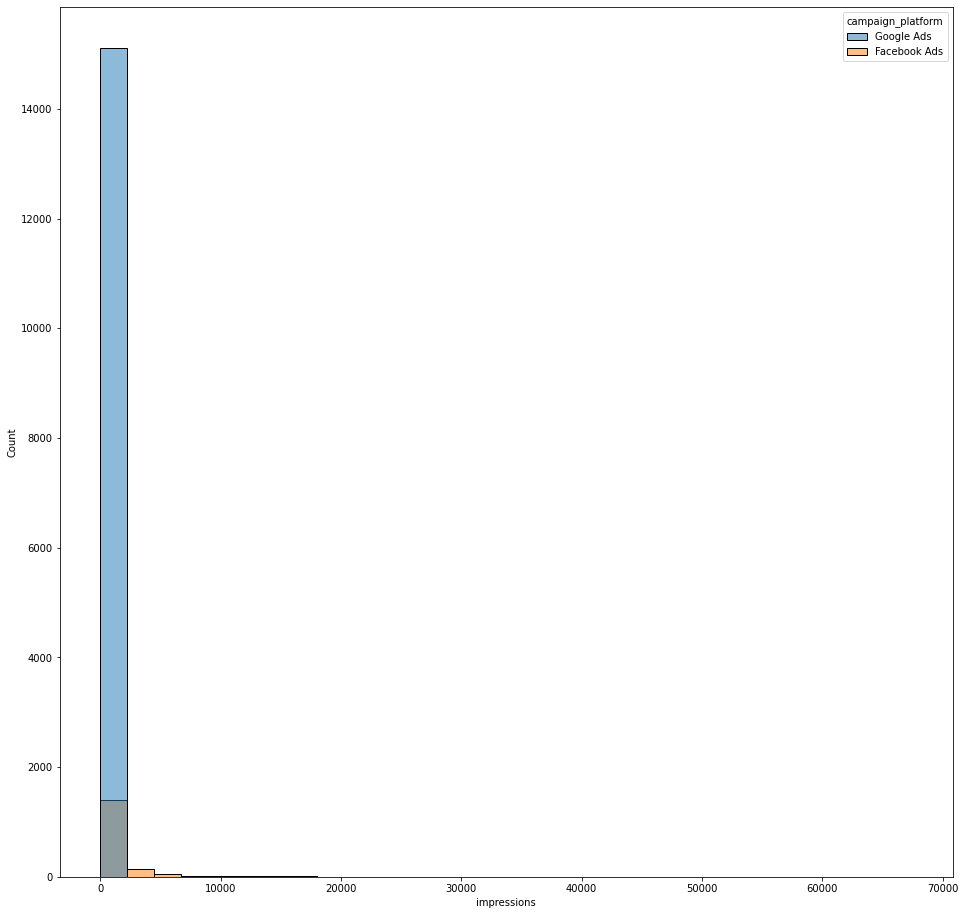

In [7]:
# 그래프를 출력할 때 필요한 설정을 해주는 matplotlib.pyplot을 불러옵니다.
import matplotlib.pyplot as plt
# histplot을 그려주는 라이브러리인 seaborn을 불러옵니다.
import seaborn as sns

# 출력할 plot의 크기를 정해줍니다. 16 x 16의 크기로 지정합니다.
plt.figure(figsize=(16, 16))
# 위에서 입력받은 x, bins, hue를 기준으로 histplot을 그립니다.
sns.histplot(data=data, x=x, bins=bins, hue=hue)
# plot을 출력합니다.
plt.show()